In [1]:
using MAT
using Plots
using DSP

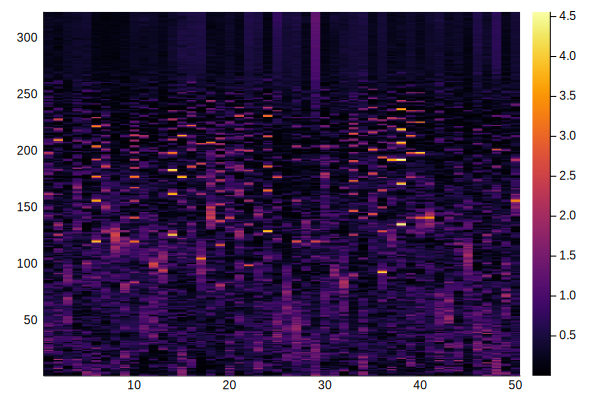

In [2]:
vars = matread("tetrisA_mono_WH.mat");
W = vars["W"];
H = vars["H"];
heatmap(W)

In [3]:
bins_per_note = 3;
harmonics = bins_per_note * [0,12,19,24,28];
penalty = bins_per_note * (1 .+ [0,4,9,16]);
offset = harmonics[end];
template = zeros(2*offset+1);\
template[penalty] .= -1.0;
template[1 .+ offset .+ harmonics] .= 1;

In [17]:
f0 = zeros(size(W,2))
for i_col = 1:size(W,2)
    f0[i_col] = findmax(xcorr(W[:,i_col],template))[2] - length(template)
end
f0_ind = sortperm(Int.(f0));
sort!(f0);

In [18]:
W2 = W[:,f0_ind];
H2 = H[f0_ind,:];

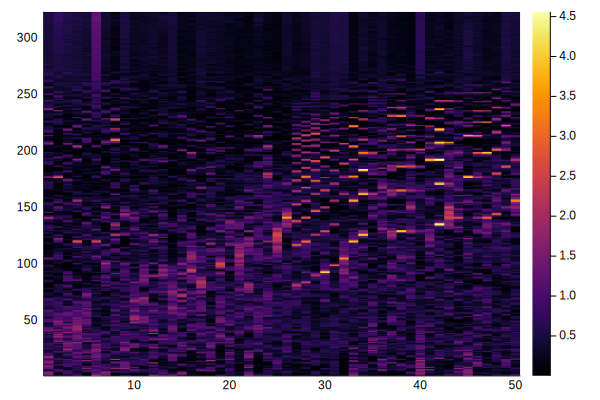

In [19]:
heatmap(W2)

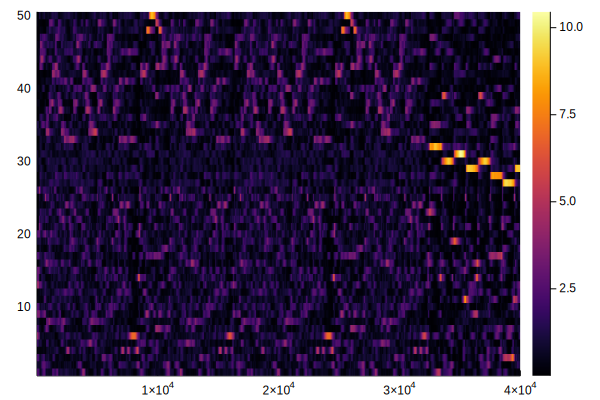

In [20]:
heatmap(H2)

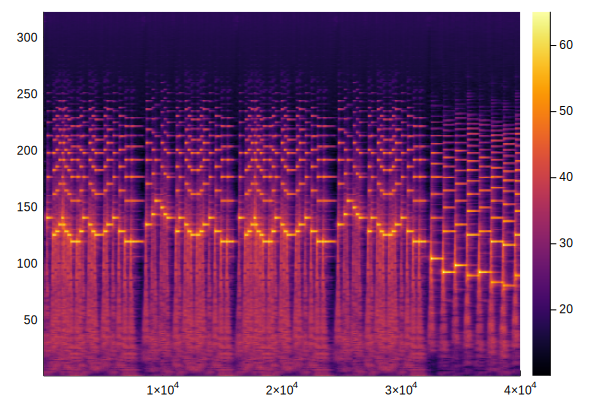

In [21]:
heatmap(W*H)